# Sleep EEG spectral analyses

## Intoductory notes:
This notebook presents spectral analyses functionality:
* Spectrogram
* PSD per sleep stage
* Topomaps for spectra per sleep stage
* Additional results such as hypnogram and sleep statistics.

Recommended readings and watchings:
1. [Mike X Cohen: Static spectral analysis](https://youtube.com/playlist?list=PLn0OLiymPak2jxGCbWrcgmXUtt9Lbjj_A)
2. [MNE: The Spectrum and EpochsSpectrum classes: frequency-domain data](https://mne.tools/stable/auto_tutorials/time-freq/10_spectrum_class.html#)

## Import data

### Import module
Add pipeline module to path and import its elements (just run this cell).

In [1]:
from sleepeeg.pipeline import SpectralPipe

### Initialize SpectralPipe object

In [2]:
spectral_pipe = SpectralPipe(
    # can be any type of eeg file that MNE's read_raw() function supports.
    path_to_eeg=r"C:\Users\Gennadiy\Documents\data\EL3001\cleaned_raw.fif",
    # A directory you want the results to be saved in.
    output_dir=r"C:\Users\Gennadiy\Documents\data\EL3001\processing",
    # Point-per-row type of hypnogram.
    path_to_hypno=r"C:\Users\Gennadiy\Documents\data\EL3001\staging.txt",
    hypno_freq=1,  # Hypnogram's sampling frequency (visbrain's hypnograms default to 1)
)

Opening raw data file C:\Users\Gennadiy\Documents\data\EL3001\cleaned_raw.fif...
    Range : 0 ... 1994499 =      0.000 ...  7977.996 secs
Ready.
Opening raw data file C:\Users\Gennadiy\Documents\data\EL3001\cleaned_raw-1.fif...
    Range : 1994500 ... 3988999 =   7978.000 ... 15955.996 secs
Ready.
Opening raw data file C:\Users\Gennadiy\Documents\data\EL3001\cleaned_raw-2.fif...
    Range : 3989000 ... 5983499 =  15956.000 ... 23933.996 secs
Ready.
Opening raw data file C:\Users\Gennadiy\Documents\data\EL3001\cleaned_raw-3.fif...
    Range : 5983500 ... 5985607 =  23934.000 ... 23942.428 secs
Ready.


Hypnogram is SHORTER than data by 0.43 seconds. Padding hypnogram with last value to match data.size.


## Hypnospectrogram

Setting 289559 of 5985608 (4.84%) samples to NaN, retaining 5696049 (95.16%) samples.


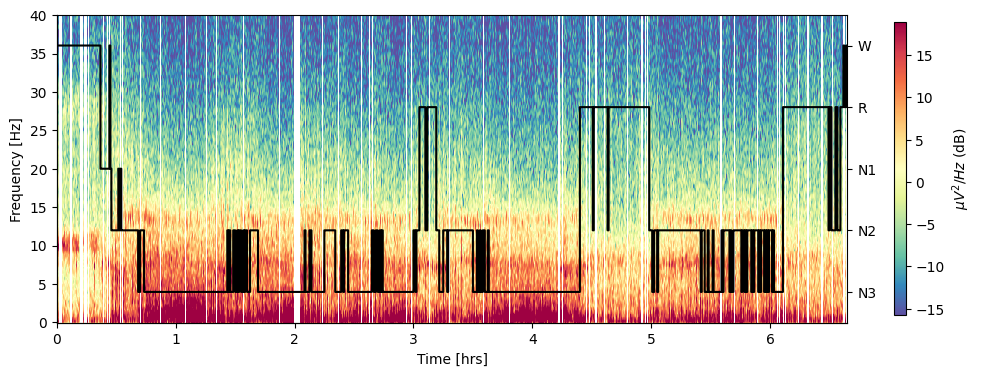

In [3]:
spectral_pipe.plot_hypnospectrogram(
    picks=["E101"],  # Channel[s] to compute spectrogram on.
    win_sec=10,  # The length of the sliding window, in seconds, used for multitaper PSD calculation.
    freq_range=(0, 40),  # Y axis limits
    cmap="Spectral_r",  # Matplotlib colormap as in https://matplotlib.org/stable/tutorials/colors/colormaps.html
    overlap=True,  # Whether to plot hypnogram over spectrogram (True) or on top of it (False)
    save=True,  # Whether to save the plot as a file.
)

## Power Spectral Density

In [4]:
spectral_pipe.compute_psds_per_stage(
    # A dict describing stages and their indices in the hypnogram file.
    sleep_stages={"Wake": 0, "N1": 1, "N2": 2, "N3": 3, "REM": 4},
    # Rereferencing to apply. Can be list of str channels or "average".
    # If None, will not change the reference.
    reference="average",
    method="welch",  # welch or multitaper
    fmin=0,  # Lower frequency bound.
    fmax=60,  # Upper frequency bound.
    picks="eeg",  # Channels to compute the PSD for.
    reject_by_annotation=True,  # Whether to reject epochs annotated as BAD.
    save=True,  # Whether to save the PSD hdf5 file for each sleep stage.
    overwrite=True,  # Whether to overwrite hdf5 files if there are any.
    n_jobs=-1,  # n_jobs, refer to the MNE documentation.
    verbose=False,  # verbose, refer to the MNE documentation.
    # Additional arguments passed to the PSD computing method, i.e., welch or multitaper:
    n_fft=1024,
    n_per_seg=1024,
    n_overlap=512,
    window="hann",
)

Reading 0 ... 5985607  =      0.000 ... 23942.428 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Setting 289559 of 5985608 (4.84%) samples to NaN, retaining 5696049 (95.16%) samples.
Setting 289559 of 5985608 (4.84%) samples to NaN, retaining 5696049 (95.16%) samples.
Setting 289559 of 5985608 (4.84%) samples to NaN, retaining 5696049 (95.16%) samples.
Setting 289559 of 5985608 (4.84%) samples to NaN, retaining 5696049 (95.16%) samples.
Setting 289559 of 5985608 (4.84%) samples to NaN, retaining 5696049 (95.16%) samples.
Overwriting existing file.
Overwriting existing file.
Overwriting existing file.
Overwriting existing file.
Overwriting existing file.


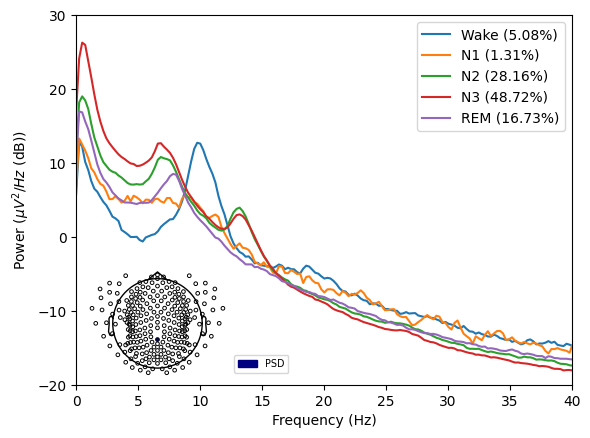

In [5]:
spectral_pipe.plot_psds(
    picks=["E101"],
    psd_range=(-20, 30),  # Y axis limits
    freq_range=(0, 40),  # X axis limits
    dB=True,
    xscale="linear",  # Matplotlib xscale. Can be {"linear", "log", "symlog", "logit", ...} or ScaleBase
    axis=None,
    plot_sensors=True,  # Whether to plot EEG sensors showing which channels were used to compute PSD.
    save=True,  # Whether to save the plot as a png file.
)

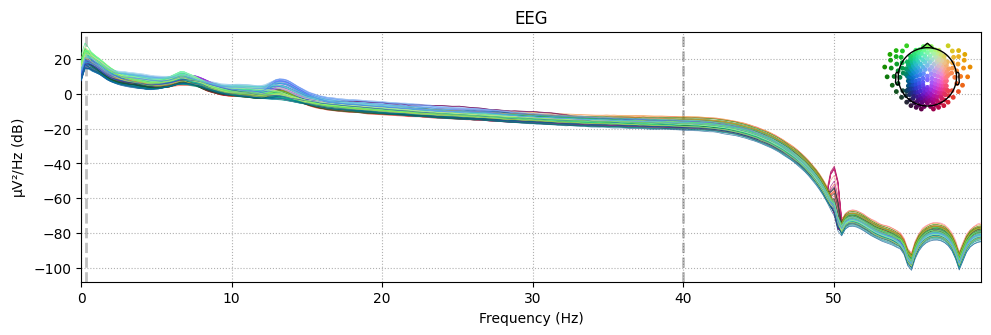

In [6]:
_ = spectral_pipe.psds["N2"].plot(picks="data", exclude="bads", show=False)

In [7]:
spectral_pipe.psds["REM"].get_data()

array([[1.50911005e-10, 8.48604393e-10, 4.53025897e-10, ...,
        1.35240851e-20, 1.71845445e-20, 1.84321307e-20],
       [1.14719172e-10, 6.44852034e-10, 3.58180465e-10, ...,
        7.22633457e-21, 8.83793666e-21, 9.62622507e-21],
       [5.82418570e-11, 3.22856534e-10, 1.92159370e-10, ...,
        8.00931316e-21, 1.03168704e-20, 1.11951590e-20],
       ...,
       [2.73357800e-11, 1.31639608e-10, 8.33189069e-11, ...,
        1.08775547e-20, 1.29737791e-20, 1.43311876e-20],
       [1.19838512e-11, 5.79691879e-11, 3.91656308e-11, ...,
        7.94232012e-21, 9.51291194e-21, 1.03070024e-20],
       [1.27977637e-11, 6.31606739e-11, 5.16432021e-11, ...,
        2.10045446e-20, 2.71880878e-20, 2.86712588e-20]])

In [8]:
spectral_pipe.psds["REM"].to_data_frame()

freq            E1            E2            E3            E4   
0     0.000000  1.509110e-10  1.147192e-10  5.824186e-11  2.956608e-11  \
1     0.244141  8.486044e-10  6.448520e-10  3.228565e-10  1.562574e-10   
2     0.488281  4.530259e-10  3.581805e-10  1.921594e-10  1.056470e-10   
3     0.732422  1.349882e-10  1.157022e-10  7.080292e-11  4.845381e-11   
4     0.976562  5.636555e-11  5.019865e-11  3.471539e-11  2.771223e-11   
..         ...           ...           ...           ...           ...   
241  58.837891  4.695638e-21  2.443231e-21  2.678040e-21  2.127735e-21   
242  59.082031  9.026561e-21  4.762342e-21  5.287282e-21  4.227935e-21   
243  59.326172  1.352409e-20  7.226335e-21  8.009313e-21  6.417695e-21   
244  59.570312  1.718454e-20  8.837937e-21  1.031687e-20  7.822135e-21   
245  59.814453  1.843213e-20  9.626225e-21  1.119516e-20  8.538195e-21   

               E5            E6            E7            E8            E9   
0    2.346526e-11  1.816256e-11  2.777285e-11  1.404878e-11  1.194076e-11  \
1    1.051958e-10  7.603045e-11  9.211502e-11  6.345477e-11  5.407896e-11   
2    7.475573e-11  5.715288e-11  6.074518e-11  5.159995e-11  4.594487e-11   
3    3.906256e-11  3.308953e-11  3.197098e-11  3.232038e-11  2.785081e-11   
4    2.455751e-11  2.206061e-11  2.154154e-11  2.233712e-11  1.858548e-11   
..            ...           ...           ...           ...           ...   
241  2.131031e-21  2.087432e-21  2.474082e-21  3.376735e-21  2.389866e-21   
242  3.949087e-21  4.140398e-21  4.715404e-21  6.555655e-21  4.409588e-21   
243  5.902532e-21  6.171362e-21  6.769536e-21  9.332583e-21  6.559376e-21   
244  7.596429e-21  7.480245e-21  8.652503e-21  1.176529e-20  8.108193e-21   
245  8.144339e-21  8.125875e-21  9.663898e-21  1.259569e-20  8.648245e-21   

     ...          E248          E249          E250          E251   
0    ...  2.275187e-10  8.133603e-11  3.497503e-11  2.895123e-11  \
1    ...  1.232304e-09  4.294603e-10  1.768363e-10  1.481089e-10   
2    ...  6.800847e-10  2.462028e-10  1.077668e-10  8.818708e-11   
3    ...  2.134453e-10  8.488126e-11  4.314296e-11  3.553700e-11   
4    ...  9.043030e-11  4.002191e-11  2.317829e-11  2.064887e-11   
..   ...           ...           ...           ...           ...   
241  ...  4.848714e-21  5.316368e-21  4.300178e-21  5.118198e-21   
242  ...  9.685688e-21  1.012550e-20  8.641417e-21  1.015303e-20   
243  ...  1.372414e-20  1.538638e-20  1.314197e-20  1.558753e-20   
244  ...  1.726482e-20  1.978857e-20  1.598637e-20  1.859203e-20   
245  ...  1.877342e-20  2.180625e-20  1.739368e-20  2.005408e-20   

             E252          E253          E254          E255          E256   
0    2.856226e-10  8.483233e-11  5.656431e-11  2.733578e-11  1.198385e-11  \
1    1.554157e-09  4.682882e-10  3.061069e-10  1.316396e-10  5.796919e-11   
2    8.544294e-10  2.621557e-10  1.739544e-10  8.331891e-11  3.916563e-11   
3    2.585568e-10  8.550565e-11  6.228436e-11  3.530291e-11  1.829532e-11   
4    1.050668e-10  3.787856e-11  2.949425e-11  1.959170e-11  1.128845e-11   
..            ...           ...           ...           ...           ...   
241  3.855568e-21  2.638783e-21  3.229416e-21  3.736202e-21  2.537457e-21   
242  7.583514e-21  5.356774e-21  6.372347e-21  7.241965e-21  5.091618e-21   
243  1.038307e-20  7.776959e-21  9.421075e-21  1.087755e-20  7.942320e-21   
244  1.310874e-20  9.520886e-21  1.148532e-20  1.297378e-20  9.512912e-21   
245  1.474245e-20  1.035679e-20  1.254928e-20  1.433119e-20  1.030700e-20   

             VREF  
0    1.279776e-11  
1    6.316067e-11  
2    5.164320e-11  
3    3.029311e-11  
4    1.957548e-11  
..            ...  
241  7.118469e-21  
242  1.343790e-20  
243  2.100454e-20  
244  2.718809e-20  
245  2.867126e-20  

[246 rows x 258 columns]

## Topomap

Plots a topomap for one stage and one frequency band

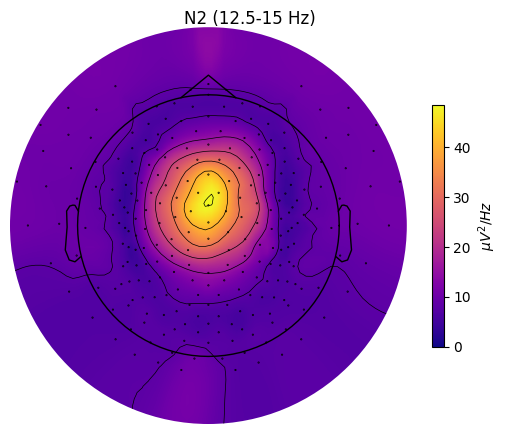

In [9]:
spectral_pipe.plot_topomap(
    stage="N2",  # Stage to plot topomap for.
    band={"SMR": (12.5, 15)},  # Band to plot topomap for.
    # Should contain at least index of the provided "stage".
    dB=False,  # Whether to transform PSD to dB/Hz
    axis=None,  # Whether to plot on provided matplotlib axis.
    save=True,  # Whether to save the plot as a file.
    topomap_args=dict(cmap="plasma"),  # Arguments passed to mne.viz.plot_topomap().
    cbar_args=None,  # Arguments passed to plt.colorbar().
    subplots_args=None,  # Arguments passed to the plt.subplots(). Have no effect if axis is provided.
)

## Topomap collage
Plot a topomap for multiple bands and sleep_stages

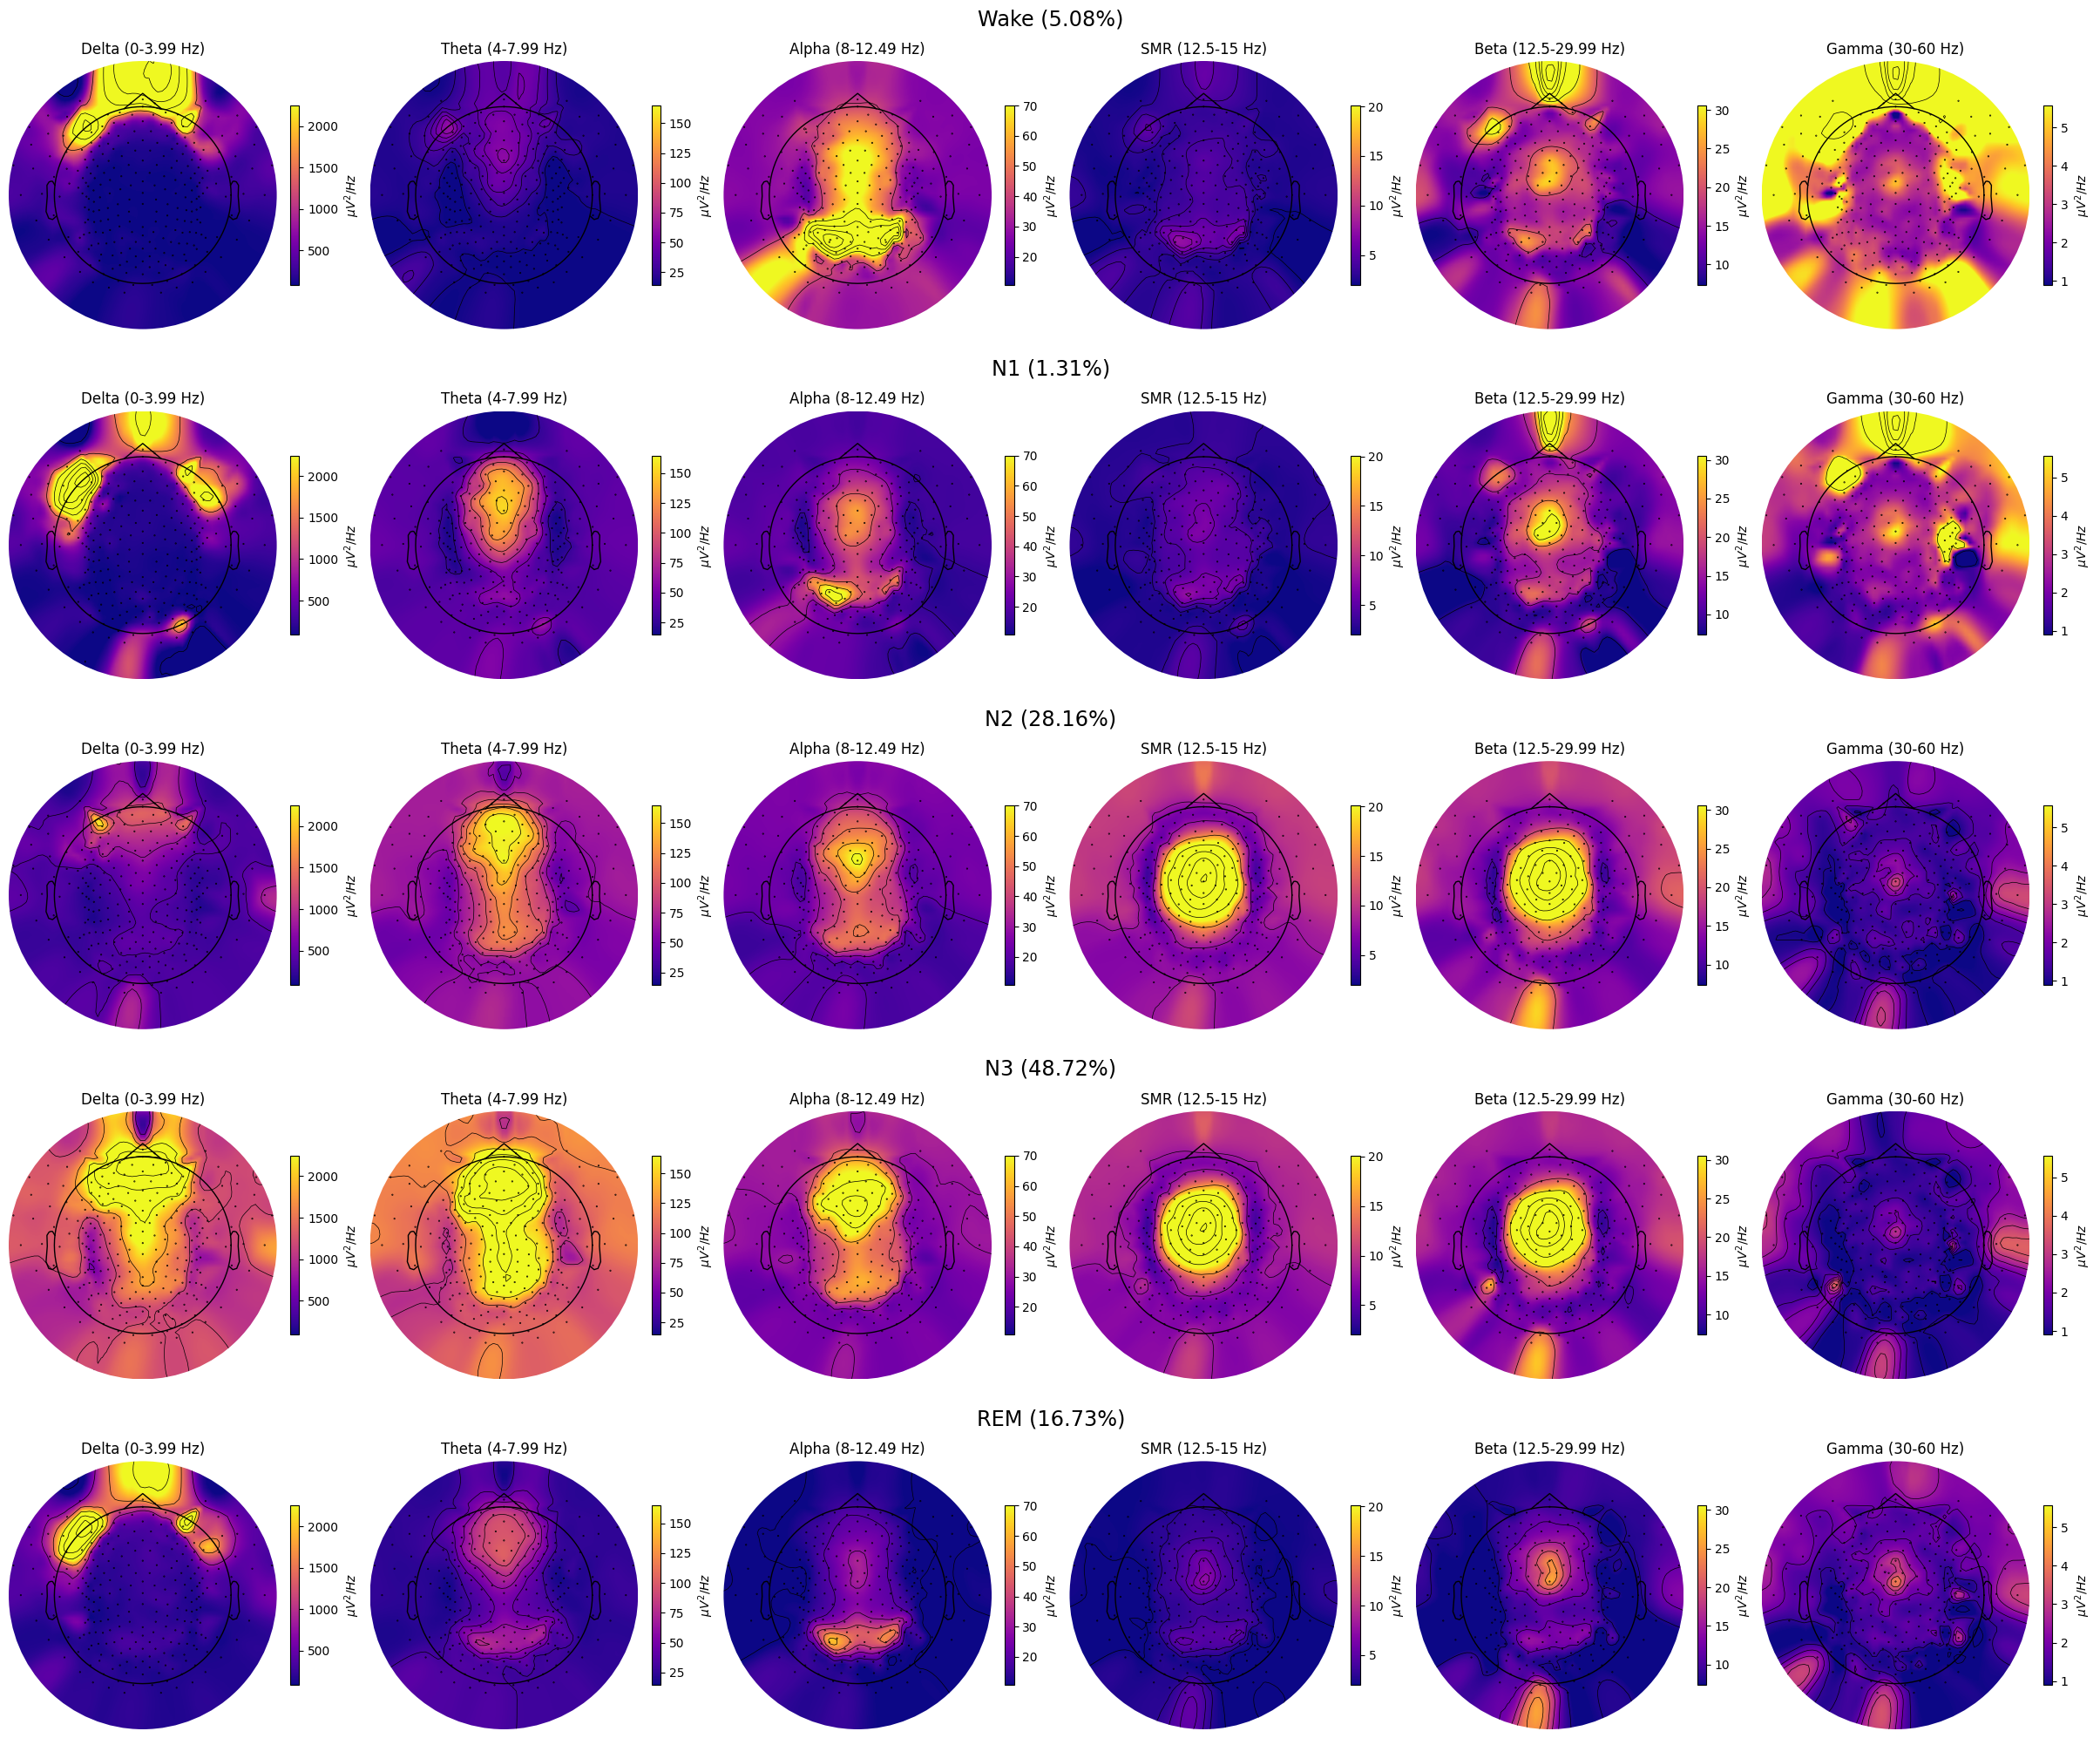

In [10]:
%matplotlib inline
spectral_pipe.plot_topomap_collage(
    #  Bands to plot topomaps for.
    bands = {'Delta': (0, 3.99), 'Theta': (4, 7.99),
            'Alpha': (8, 12.49), 'SMR': (12.5, 15), 
            'Beta': (12.5, 29.99), 'Gamma': (30, 60)},
    # Tuple of strs or "all", e.g., ("N1", "REM") or "all" (plots all "sleep_stages").
    stages_to_plot="all", 
    dB=False,  # Whether to transform PSD to dB/Hz.
    low_percentile=5,  # Set min color value by percentile of the band data.
    high_percentile=95,  # Set max color value by percentile of the band data.
    save=True,  # Whether to save the plot as a file.
    topomap_args=dict(cmap='plasma'),  # Arguments passed to mne.viz.plot_topomap().
    cbar_args=None,  # Arguments passed to plt.colorbar().
    figure_args=None,  # Arguments passed to the plt.figure().
)

## Sleep Stats

In [4]:
spectral_pipe.sleep_stats(save=False)

{'TIB': 399.03333333333336,
 'SPT': 376.5,
 'WASO': 1.0,
 'TST': 375.5,
 'N1': 6.0,
 'N2': 109.5,
 'N3': 191.0,
 'REM': 69.0,
 'NREM': 306.5,
 'SOL': 22.0,
 'Lat_N1': 22.0,
 'Lat_N2': 27.5,
 'Lat_N3': 41.0,
 'Lat_REM': 183.0,
 '%N1': 1.5978695073235685,
 '%N2': 29.161118508655125,
 '%N3': 50.865512649800266,
 '%REM': 18.37549933422104,
 '%NREM': 81.62450066577897,
 'SE': 94.10241416757162,
 'SME': 99.734395750332}